In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [2]:
#Read data from external csv file

data=pd.read_csv('housing.csv')
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
#Format input for neural network

def boolean_conversion(header:str)->np.ndarray:
    """
    Converts yes/no values to 1/0
    """

    values=data[header].values
    for i in range(len(values)):
        if values[i]=='yes':
            values[i]=1
        else:
            values[i]=0
    return values.reshape(-1,1)

#Numerical inputs
area=data['area'].values.reshape(-1,1)
area=area/area.max() #Normalization

bedrooms=data['bedrooms'].values.reshape(-1,1)
bedrooms=bedrooms/bedrooms.max() #Normalization

bathrooms=data['bathrooms'].values.reshape(-1,1)
bathrooms=bathrooms/bathrooms.max() #Normalization

stories=data['stories'].values.reshape(-1,1)
stories=stories/stories.max() #Normalization

parking=data['parking'].values.reshape(-1,1)
parking=parking/parking.max() #Normalization

#Boolean inputs
ainroad=boolean_conversion('mainroad')
guestroom=boolean_conversion('guestroom')
basement=boolean_conversion('basement')
hotwaterheating=boolean_conversion('hotwaterheating')
airconditioning=boolean_conversion('airconditioning')
prefarea=boolean_conversion('prefarea')

#Categorical input
furnishingstatus=data['furnishingstatus'].values
for i in range(len(furnishingstatus)):
    if furnishingstatus[i]=='furnished':
        furnishingstatus[i]=1
    elif furnishingstatus[i]=='semi-furnished':
        furnishingstatus[i]=0.5
    else:
        furnishingstatus[i]=0
furnishingstatus = furnishingstatus.reshape(-1,1)

model_in = np.hstack((area, bedrooms, bathrooms, stories, parking, ainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus))

In [4]:
#Format expected output

y=data['price'].values
y_multiplier = y.max() #To convert back to original price
y=y/y.max() #Normalization
print(y)

[1.         0.92105263 0.92105263 0.91842105 0.85789474 0.81578947
 0.76315789 0.76315789 0.74210526 0.73684211 0.73684211 0.72789474
 0.7        0.69473684 0.69473684 0.68421053 0.68421053 0.67368421
 0.66842105 0.66578947 0.65789474 0.65263158 0.65       0.65
 0.64473684 0.64210526 0.63631579 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.62368421 0.61578947 0.61052632 0.60758947
 0.60473684 0.6        0.59868421 0.59473684 0.59210526 0.58947368
 0.57894737 0.57894737 0.56842105 0.56842105 0.56578947 0.56315789
 0.56052632 0.55789474 0.55789474 0.55789474 0.55263158 0.55263158
 0.55263158 0.55263158 0.55210526 0.54473684 0.54210526 0.54210526
 0.53684211 0.53157895 0.53157895 0.52894737 0.52631579 0.52105263
 0.52105263 0.51842105 0.51578947 0.51052632 0.51052632 0.50789474
 0.50526316 0.50263158 0.5        0.5        0.5        0.5
 0.5        0.5        0.49842105 0.49736842 0.49736842 0.49473684
 0.48947368 0.48947368 0.48947368 0.48684211 0.48684211 0.48421053
 0.48421

In [5]:
max_iter=500
learning_rate=0.001
activation_funtion = 'relu'

In [6]:
nn_model=MLPRegressor(hidden_layer_sizes=(512,128,32),max_iter=max_iter,learning_rate_init=learning_rate,activation=activation_funtion)
nn_model.fit(model_in,y)

,loss,'squared_error'
,hidden_layer_sizes,"(512, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True


In [7]:
#Find loss for each iteration

loss_values=[]
for i in range(max_iter):
  nn_model.partial_fit(model_in,y)
  y_pred_partial=nn_model.predict(model_in)
  loss=np.mean((y-y_pred_partial)**2)
  loss_values.append(loss)

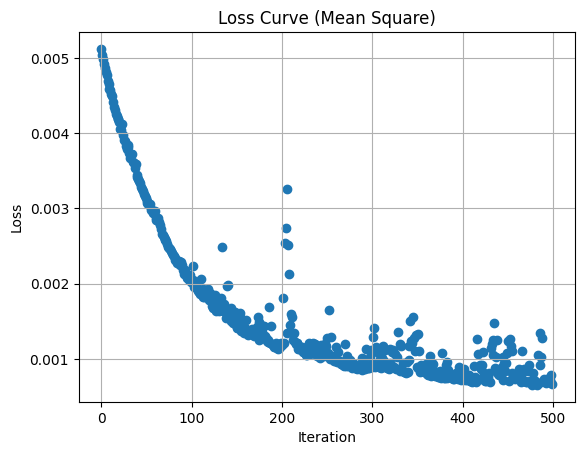

In [8]:
#Plot loss against iterations

plt.scatter(range(max_iter),loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve (Mean Square)')
plt.grid(True)
plt.show()

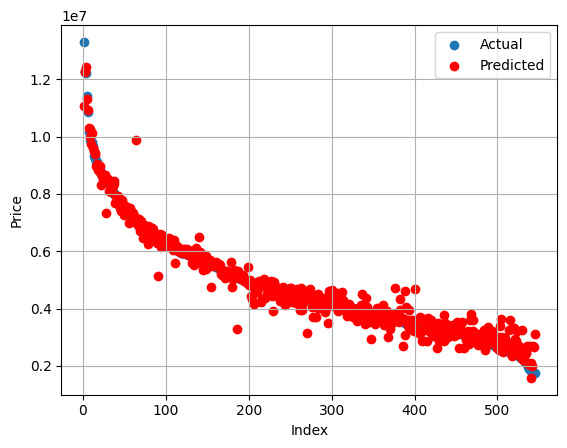

In [9]:
#Plot actual vs predicted values

x = [i for i in range(1,len(y)+1)]

plt.scatter(x,y*y_multiplier,label='Actual')
plt.scatter(x,y_pred_partial*y_multiplier, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()